# Expected Persistence Diagram Estimation with Ripser++
---



Simon Zhang

Due to the ending of Moore's law GPUs offer the performance growth of hardware in the future. GPUs have thus become common place on everyday computers.

*Even better, with the cloud and Google Colab we can run high performance GPUs and in particular Ripser++ on any device on our browser and in particular on our cellphones!*

In this tutorial we demostrate the easy to use and high performance of Ripser++ for a small statistical problem.



##Introduction to Ripser++:

Ripser++ is a GPU based software for computing Vietoris-Rips persistence barcodes. In its computation, it parallelizes two components of the matrix reduction algorithm for persistent cohomology computation.

1. It builds the simplex-wise flag filtration for each dimension massively in parallel, utilizing the clearing lemma and the combinatorial index to represent simplices.

  a. a simplex-wise flag filtration is determined by the edges formed by Vietoris-Rips complexes at different scales on an input point cloud

  b. the clearing lemma eliminates simplices from the filtration since they are zero columns in the matrix for computation

  c. the combinatorial index represents simplices by a single integer

2. It finds apparent pairs massively in parallel on GPU for matrix reduction on a submatrix.

  a. apparent pairs are persistence pairs that are as close as possibe in the simplex-wise flag filtration

Along with these two properties, Ripser++ also implements

3. An efficient two-layered hashmap for storing persistence pairs

4. A GPU-CPU hybrid


For more details on Ripser++ see the paper located here: https://arxiv.org/pdf/2003.07989.pdf



Recall that a persistence diagram and a persistence barcode are equivalent outputs of ripser++. In the following experiment, we attempt to compute a limiting object for sample averages of persistence diagrams of a fixed number of points from a random distribution.

## Experiment to Estimate the Expected Persistence Diagram

We compute an estimator of the expected persistence diagram based on the tutorial located here: https://github.com/GUDHI/TDA-tutorial/blob/054b30000a26d6f7e11966bf41c888d954963137/Tuto-GUDHI-Expected-persistence-diagrams.ipynb

This tutorial illustrates the notion of "Expected Persistence Diagram" defined by Chazal and Divol here: https://arxiv.org/pdf/1802.10457.pdf. The expected persistence diagram represents the topology of a *random* source by a *deterministic* measure.

A persistence diagram can be computed as a topological descriptor of some input data $X$. In our case we will consider a point cloud as input with $\mathrm{Dgm}(X)$ denoting a persistence diagram, which by definition is supported on a half plane $\Omega \subset \mathbb{R}^2$.



### Some Background

Now, consider that our point cloud is random. Here, we will consider that it consists of $n$ points sampled _i.i.d_ with respect to some fixed underlying distribution $\xi$, thus denoted as $\mathbb{X}_n = \{X_1 \cdots X_n\}$, with $X_i \sim \xi$. To a *random* realization of $\mathbb{X}_n$ corresponds a *random* persistence diagram. Let $\mathrm{Dgm}(\mathbb{X}_n)$ denote the this random persistence diagram. It is a random variable.

Theoretically computing $\mathbb{EPD}(\mathbb{X}_n)$ cannot be done. In practice, one is more likely to have access to some random point clouds $(\mathbb{X}_n^{(k)})_k \in \mathbb{R}^{d \times n \times n_\mathrm{obs}}$, $k = 1 \dots n_\mathrm{obs}$.

From here on out, we redefine a persistence diagram as a sum of dirac measures on $\Omega$ not involving the diagonal as: $\mathrm{Dgm}(\mathrm{Y})=\Sigma_{p \in \mathrm{Dgm}(\mathrm{Y})} \delta_{p}$ where Y is a given point cloud.

Define
$$\mathrm{Pers}_p(\mu)= \int_{\Omega} \|x-\partial \Omega \|^p d\mu(x)$$
where $\|x-\partial \Omega \|= (t_2-t_1)/\sqrt{2}$ is the persistence of a point $x= (t_1,t_2) \in \Omega$ and $\mu$ is a persistence diagram.


Also, define $$OT_p(\mu,\nu):= \inf_{\pi \in \mathcal{C^{-}}(\mu,\nu)} ((\int\int_{\Omega \times \Omega} \| x-y\|^p d\pi)+ \mathrm{Pers}_p(\mu-proj_1(\pi))+ \mathrm{Pers}_p(\nu-proj_2(\pi)))^{1/p}$$
where $\mathcal{C}^{-}= \{ \pi\in \mathcal{M}(\Omega \times \Omega) \mid proj_1(\pi) \leq \mu, proj_2(\pi) \leq \nu \}$ are the set of subcoupling measures where $proj_1(\pi)(A)= \mu(A \times \Omega)$ and $proj_2(\pi)(B)= \mu(\Omega \times B)$.

Define:
$$\forall K \subset \Omega, \mathbb{EPD}(P)[K] := \mathbb{E}_P[\mu(K)],$$

where $\mu(K)$ is, by definition, the (random) number of points in $\mu$ that belong to $K$ where $\mu$ is a persistence diagram with $\mu \sim P$ and $K$ is a compact subset of $\Omega$.

It is shown in https://arxiv.org/pdf/2105.04852.pdf the following lemma, whose proof depends on the strong law of large numbers:

**Lemma:**
Let $P$ be a probability distribution on the space of persistence diagrams with $\mathbb{E}_P[Pers_p(\mu)] < \infty$, $\forall \mu$ s.t. $\mu \sim P$. Let $(\mu_k)_{k \geq 1}$ be a sequence of i.i.d. variables of law P and let $\bar{\mu}_k= \frac{1}{k}(\mu_1+...+\mu_k)$. Then,
$$OT_p(\bar{\mu}_k, \mathbb{EPD}(P)) \rightarrow 0 \text{ as } k \rightarrow \infty \text{ almost surely}$$

---

Referring to the lemma above, let $P$ be the distribution on random persistence diagrams induced by random point clouds on n points with points sampled from law $\xi$.

Define the sample average of persistence diagrams as: $\overline{\mathrm{Dgm}}_{n_{obs}}= \frac{1}{n_\mathrm{obs}} \sum_{k=1}^{n_\mathrm{obs}} \mathrm{Dgm}(\mathbb{X}_n^{(k)})$. Assuming $\mathbb{E}_P[Pers_p(\mu)]<\infty$ for $\mu \sim P$, by the lemma we have that $\overline{\mathrm{Dgm}}_{n_{obs}}$ converges to $\mathbb{EPD}(P)$ with respect to the $OT_p$ distance almost surely (with probability one).







## Experiment

We will showcase expected diagrams in the following simple context:
- Consider a point cloud $X$ with $n_\mathrm{tot}$ points, which splits in $(1-p)n_\mathrm{tot}$ points sampled on a nice shape $\mathcal{M}$ (here, a simple circle), and $p n_\mathrm{tot}$ outliers, where $p \in (0,1)$ is the proportion of outliers. Let us call $X_\mathrm{true}$ and $X_\mathrm{out}$ these two point clouds.
- The "large" point cloud $X$ should represent an underlying slightly noised distribution $\xi$, namely a slightly noisy circle. Computing directly the (Vietoris-Rips complex) diagram of the whole point cloud $X$ should reflect the distribution of persistence diagrams $P$
- Sampling "smaller" point clouds from $X$ and computing their Vietoris-Rips persistence diagram and then averaging, we obtain (an estimator of) $\mathbb{EPD}(P)$ as determined by the lemma given above.
- As the distributions $P$ and the distribution of the diagrams of point clouds sampled from the simple circle $\mathcal{M}$ are similar (in Wasserstein sense), so should be their expected persistence diagrams. See the stability statement of Proposition 5.4 of https://arxiv.org/pdf/1901.03048.pdf.

#### Imports

In [ ]:
!pip install ripser
!pip install ripserplusplus
!pip install gudhi
!apt-get install cm-super
!apt-get install dvipng texlive-latex-extra texlive-fonts-recommended

     |████████████████████████████████| 71kB 7.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 51kB 8.6MB/s 
  Created wheel for ripser: filename=ripser-0.6.0-cp37-cp37m-linux_x86_64.whl size=454919 sha256=c7897a622e7bceb3c73981884287fbb477dda0c7ef73262856b000fcac35897c
  Stored in directory: /root/.cache/pip/wheels/95/1e/13/59da989de59903698d767dcb19414163e683a2dd31edf80417
Successfully built ripser
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18091 sha256=d9fe25a7fb7958c712e755b8231177437311a7b8d4408bbed50c00ac788a9d7d
  Stored in directory: /root/.cache/pip/wheels/2b/e1/c9/1993c7f7f114b7d3fb2d3e895e02157a7ebf554861e9e54e01
Successfully built hopcroftkarp
     |████████████████████████████████| 5.8MB 14.0MB/s 
  Created wheel for ripserplusplus: filename=ripserplusplus-1.1.2-cp37-cp37m-linux_x86_64.whl size=478485 sha2

In [ ]:
# Note: %matplotlib notebook allows for iteractive 3D plot.
#%matplotlib notebook
%matplotlib inline

In [ ]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib import rc
import ripserplusplus as rpp
from ripser import ripser
from tqdm import tqdm
import sys
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#### Sampling functions

In [ ]:
def sample_circle(n):
    theta = 2 * np.pi * np.random.rand(n)
    x, y = np.cos(theta), np.sin(theta)
    return np.array([x, y]).T


def sample_torus(n, r1, r2):
    theta1 = 2 * np.pi * np.random.rand(n)
    theta2 = 2 * np.pi * np.random.rand(n)

    x = (r1 + r2 * np.cos(theta2)) * np.cos(theta1)
    y = (r1 + r2 * np.cos(theta2)) * np.sin(theta1)
    z = r2 * np.sin(theta2)

    X = np.array([x, y, z]).T

    return X
def sample_hypercube(n):
  return np.random.random((n,100000))

def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

def sample_hypersphere(n):
  return sample_spherical(n)

In [ ]:
def sample_noise(N, ndim, scale=1., type="uniform"):
    '''
    noise sample uniforme on [-scale, scale]^2 or gaussien N(0, scale^2)
    '''
    if type=="uniform":
        X_noise = scale * (2 * np.random.rand(N, ndim) - 1)
    elif type=="gaussian":
        X_noise = scale * np.random.randn(N, ndim)
    return X_noise


def add_noise(X_noise, X):
    return np.concatenate([X, X_noise])

In [ ]:
def ripscomplex(X, hdim=1):
    pairs= rpp.run("--format point-cloud --dim "+str(hdim), X)[hdim]
    return np.sqrt(np.array((pairs.tolist())).reshape((len(pairs),2)))


In [ ]:
def ripscomplex_ripser(X, hdim=1):
  h1= ripser(X, maxdim=1)['dgms'][1]
  return np.sqrt(h1)

In [ ]:
def ripscomplex_gudhi(X, hdim=1):
  ac = gd.RipsComplex(points=X)
  st = ac.create_simplex_tree(max_dimension=hdim+1)
  pers = st.persistence(min_persistence=0.0001)
  h1 = st.persistence_intervals_in_dimension(hdim)
  return np.sqrt(np.array(h1))

In [ ]:
# Compute persistence diagram using the Cech filtration
def alphacomplex(X, hdim=1):
    ac = gd.AlphaComplex(points=X)
    st = ac.create_simplex_tree()
    pers = st.persistence(min_persistence=0.0001)
    h1 = st.persistence_intervals_in_dimension(hdim)
    return np.sqrt(np.array(h1))  # we must sqrt to get Cech dgm

In [ ]:
def expected_dgm(X, n, k, hdim=1, replace=True):
    '''
    Subsample n points in a point cloud X, k times, and return the k computed persistence diagrams.
    '''
    N = len(X)  # total nb of points
    samples = [np.random.choice(N, n, replace=replace) for _ in range(k)]
    Xs = [X[sample] for sample in samples]
    #diags = [ripscomplex(X,hdim=hdim) for X in Xs]#[alphacomplex(X, hdim=hdim) for X in Xs]
    diags= []
    #sys.stdout.write('\033[2K\033[1G')
    #print('\033[2K\033[1G')
    for i in tqdm(range(len(Xs))):
      diags.append(ripscomplex(Xs[i],hdim=hdim))
      #print('\033[2K\033[1G')
      if(i%100==0):
        #print('\033[2K\033[1G')
        sys.stdout.write('\033[2K\033[1G')
    return diags

#### Plot utils

In [ ]:
# Discretization utils to plot expected PD in a nice way.

def discretize_dgm(diag, m=0, M=1, res=30, expo=2., filt=None, sigma=1.):
    '''
    Discretize one diagram, returns a 2D-histogram of size (res x res), the grid representing [m, M]^2.
    '''
    if diag.size:
        h2d = np.histogram2d(diag[:,0], diag[:,1], bins=res, range=[[m, M],[m, M]])[0]
        h2d = np.flip(h2d.T, axis=0)
        if filt=="gaussian":
            h2d = gaussian_filter(h2d, sigma=sigma)
        return h2d
    else:
        return np.zeros((res, res))

def tohist(diags, m=0, M=1, res=30, expo=2.,filt=None, sigma=1.):
    '''Take a list of observed diagrams 'diags' and return an histogram
    which is an estimator of E(Dgm(X_n)) for some integer n'''

    output = [discretize_dgm(diag, m=m, M=M, res=res, expo=expo, filt=filt, sigma=sigma)
             for diag in diags]
    return np.mean(output, axis=0)


In [ ]:
def plot3d(X, X_noise):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:,2], marker='o', color='blue')
    ax.scatter(X_noise[:,0], X_noise[:,1], X_noise[:,2], marker='x', color='red')

def plot2d(X, X_noise):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X[:,0], X[:,1], marker='x', color='blue')
    ax.scatter(X_noise[:,0], X_noise[:,1], marker='x', color='red')
    ax.set_aspect("equal")


def plot_object(X, X_noise):
    if X.ndim == 2:
        plot2d(X, X_noise)
    elif X.ndim == 3:
        plot3d(X, X_noise)
    else:
        print("Unknown number of dimension. Input should be a 2D or a 3D point cloud.")

In [ ]:
def plot_hist(h, ax=None):
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    ax.imshow(h, cmap='hot_r', interpolation='bilinear')
    L = h.shape[0]
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("Births", fontsize=18)
    ax.set_ylabel("Deaths", fontsize=18)
    ax.add_patch(Polygon([[L,-1], [L,L], [-1,L]], fill=True, color='lightgrey'))
    ax.set_title("Expected PD", fontsize=24)

def plot_dgm(dgm_true, dgm_tot, m, M, ax=None):
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    x, y = dgm_true[:,0], dgm_true[:,1]
    ax.scatter(x, y, marker='o', color='blue', label='true dgm')
    ax.scatter(dgm_tot[:,0], dgm_tot[:,1], marker='x', color='red', label='total dgm')
    ax.set_xlim(m,M)
    ax.set_ylim(m,M)
    ax.add_patch(Polygon([[m, m], [M, m], [M, M]], fill=True, color='lightgrey'))
    ax.set_aspect("equal")
    ax.set_xlabel("Births", fontsize=18)
    ax.set_ylabel("Deaths", fontsize=18)

    ax.legend()
    ax.set_title("Diagrams", fontsize=24)

### Numerical Computation

In [ ]:
nb_tot = 2000
prop_noise = 0.007
nb_points = int((1 - prop_noise) * nb_tot)
nb_noise = nb_tot - nb_points

print("Number of point on the shape:", nb_points)
print("Number of points corresponding to noise:", nb_noise)
print("Proportion of noise:", prop_noise)
print("Total number of points:", nb_tot)

Number of point on the shape: 1986
Number of points corresponding to noise: 14
Proportion of noise: 0.007
Total number of points: 2000


In [ ]:
#X = sample_torus(nb_points, r1 = 3, r2 = 1)
X = sample_circle(nb_points)
#X = sample_hypercube(nb_points)
#X= sample_hypersphere(nb_points)
X_noise = sample_noise(nb_noise,
                       ndim = X.shape[1],
                       scale = np.std(X),
                       type="uniform")

In [ ]:
X_tot = add_noise(X_noise, X)

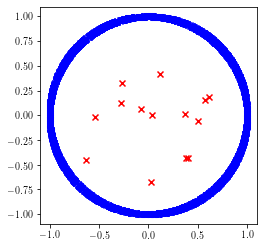

In [ ]:
plot_object(X, X_noise)

For the following computation:

Gudhi runs out of memory for 2000 points.

Ripser.py runs in 4 minutes 40 seconds.

Ripser++ runs in 2 minutes.



In [ ]:
import time
start= time.time()
dgm_tot= ripscomplex(X_tot)
dgm_true= ripscomplex(X)
end= time.time()
print("rips computatation time: ",end-start)

rips computatation time:  123.5130820274353


In [ ]:
nb_points_samples =100
nb_repeat = 5000

In [ ]:
# Resolution parameters
m=-0.1
M=2

ripser: 5000 iterations for about 2 minutes

ripser++: 5000 iterations for about 1 minute

In [ ]:
start= time.time()
diags = expected_dgm(X_tot, nb_points_samples, nb_repeat)
h = tohist(diags, m=m, M=M)
end= time.time()
print("expected diagram estimator time", end-start,"seconds")

  0%|          | 0/5000 [00:00<?, ?it/s]

  2%|▏         | 105/5000 [00:02<02:16, 35.98it/s]

  4%|▍         | 208/5000 [00:05<02:10, 36.63it/s]

  6%|▌         | 307/5000 [00:07<02:02, 38.42it/s]

  8%|▊         | 406/5000 [00:10<02:12, 34.72it/s]

 10%|█         | 504/5000 [00:13<01:43, 43.51it/s]

 12%|█▏        | 603/5000 [00:15<01:35, 46.25it/s]

 14%|█▍        | 706/5000 [00:18<01:46, 40.39it/s]

 16%|█▌        | 810/5000 [00:21<01:53, 37.02it/s]

 18%|█▊        | 907/5000 [00:24<01:53, 36.21it/s]

 20%|██        | 1006/5000 [00:27<01:54, 34.84it/s]

 22%|██▏       | 1112/5000 [00:30<01:46, 36.37it/s]

 24%|██▍       | 1207/5000 [00:33<01:50, 34.47it/s]

 26%|██▌       | 1305/5000 [00:35<01:50, 33.37it/s]

 28%|██▊       | 1406/5000 [00:37<01:15, 47.44it/s]

 30%|███       | 1508/5000 [00:40<01:26, 40.24it/s]

 32%|███▏      | 1606/5000 [00:43<01:30, 37.33it/s]

 34%|███▍      | 1713/5000 [00:45<01:02, 52.31it/s]

 36%|███▌      | 1806/5000 [00:48<01:30, 35.12it/s]

 38%|███▊      | 1906/5000 [00:50<01:09, 44.62it/s]

 40%|████      | 2007/5000 [00:53<01:16, 38.88it/s]

 42%|████▏     | 2105/5000 [00:55<01:15, 38.22it/s]

 44%|████▍     | 2206/5000 [00:58<01:24, 33.23it/s]

 46%|████▋     | 2321/5000 [01:01<00:34, 78.25it/s]

 48%|████▊     | 2421/5000 [01:02<00:24, 104.43it/s]

 50%|█████     | 2513/5000 [01:03<00:29, 84.91it/s]

 52%|█████▏    | 2614/5000 [01:04<00:24, 98.88it/s] 

 54%|█████▍    | 2713/5000 [01:05<00:21, 105.01it/s]

 56%|█████▋    | 2814/5000 [01:06<00:21, 100.77it/s]

 58%|█████▊    | 2917/5000 [01:07<00:19, 105.36it/s]

 60%|██████    | 3017/5000 [01:08<00:19, 100.48it/s]

 62%|██████▏   | 3116/5000 [01:09<00:18, 100.48it/s]

 64%|██████▍   | 3215/5000 [01:09<00:17, 100.77it/s]

 66%|██████▋   | 3323/5000 [01:11<00:16, 103.53it/s]

 68%|██████▊   | 3412/5000 [01:11<00:15, 100.03it/s]

 70%|███████   | 3521/5000 [01:13<00:14, 103.92it/s]

 72%|███████▏  | 3621/5000 [01:13<00:12, 107.01it/s]

 74%|███████▍  | 3722/5000 [01:14<00:11, 106.59it/s]

 76%|███████▋  | 3817/5000 [01:15<00:12, 98.21it/s]

 78%|███████▊  | 3917/5000 [01:16<00:10, 101.71it/s]

 80%|████████  | 4012/5000 [01:17<00:09, 102.75it/s]

 82%|████████▏ | 4113/5000 [01:18<00:08, 101.62it/s]

 84%|████████▍ | 4219/5000 [01:19<00:08, 93.87it/s]

 86%|████████▋ | 4317/5000 [01:21<00:07, 90.55it/s]

 88%|████████▊ | 4422/5000 [01:22<00:05, 102.49it/s]

 90%|█████████ | 4508/5000 [01:23<00:11, 43.60it/s]

 92%|█████████▏| 4609/5000 [01:26<00:09, 39.26it/s]

 94%|█████████▍| 4706/5000 [01:29<00:07, 37.21it/s]

 96%|█████████▌| 4805/5000 [01:31<00:05, 36.05it/s]

 98%|█████████▊| 4906/5000 [01:34<00:02, 34.86it/s]

100%|██████████| 5000/5000 [01:37<00:00, 51.49it/s]


expected diagram estimator time 98.16397857666016 seconds


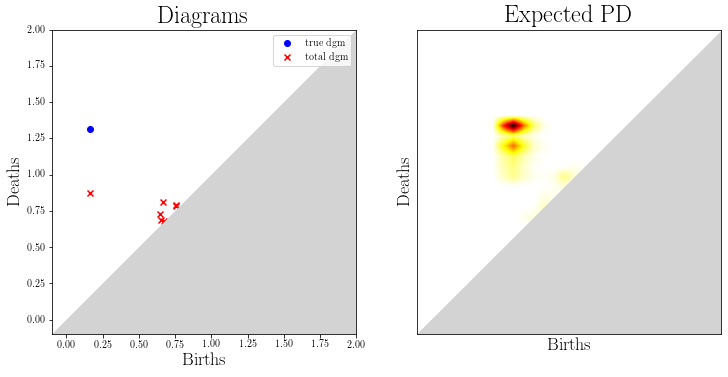

In [ ]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plot_dgm(dgm_true, dgm_tot, m = m, M=M, ax=ax1)
plot_hist(h, ax=ax2)

As one can see, the expected persistence diagram is much more similar to the true diagram !